### Linear Regression Problem 

In [1]:
import torch
from torch import nn
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Creating data

In [2]:
X, y = datasets.make_regression(n_samples=200, noise=25, n_features=1,random_state=33)
X.shape, y.shape

((200, 1), (200,))

In [3]:
from matplotlib import pyplot as plt

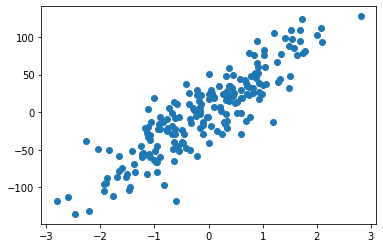

In [4]:
plt.scatter(X, y)

### Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

X[:2], y[:2]

(array([[ 0.34346274],
        [-1.60298056]]),
 array([-21.15663153, -74.24766618]))

### Creating tensors from our data

In [6]:
X_train = torch.from_numpy(X_train.astype("float32"))
X_test = torch.from_numpy(X_test.astype("float32"))
y_train = torch.from_numpy(y_train.astype("float32"))
y_test = torch.from_numpy(y_test.astype("float32"))
X_test[:2]

tensor([[-2.8094],
        [ 0.5278]])

### Creating A Model

In [7]:
input_size = X_test.shape[1]
input_size

1

In [8]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(in_features=input_size, out_features=1)
        
    def forward(self, X):
        return self.lin(X)

model = LinearRegression()
model

LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)

### Optimizer and Loss

In [9]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Trainning the Model

In [10]:
EPOCHS = 200
for epoch in range(EPOCHS):
    # forward pass
    y_pred = model(X_train)
    # loss
    loss = loss_function(y_train, y_pred)
    ## backward pass
    loss.backward()
    ## update the weights
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 20 == 0:
        print(f"Epoch: {epoch+1}/{EPOCHS}")
        print("Loss: ", loss.item())

Epoch: 1/200
Loss:  2962.9931640625
Epoch: 21/200
Loss:  2960.825439453125
Epoch: 41/200
Loss:  2958.8935546875
Epoch: 61/200
Loss:  2957.2001953125
Epoch: 81/200
Loss:  2955.721435546875
Epoch: 101/200
Loss:  2954.42724609375
Epoch: 121/200
Loss:  2953.288330078125
Epoch: 141/200
Loss:  2952.278076171875
Epoch: 161/200
Loss:  2951.37646484375
Epoch: 181/200
Loss:  2950.5673828125


C:\Users\crisp\Documents\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([140, 1])) that is different to the input size (torch.Size([140])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [11]:
model(X_test[:2]), y_test[:2]

(tensor([[-3.5672],
         [-2.5627]], grad_fn=<AddmmBackward>),
 tensor([-118.3611,   -1.6715]))